<a href="https://colab.research.google.com/github/thanhnhan311201/CS114.L11.KHCL/blob/master/PreprocessingImage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving HandWritenCharacter.rar to HandWritenCharacter.rar


In [ ]:
!pip install patool

In [ ]:
import patoolib
patoolib.extract_archive('/content/HandWritenCharacter.rar')

patool: Extracting /content/HandWritenCharacter.rar ...
patool: running /usr/bin/unrar x -- /content/HandWritenCharacter.rar
patool:     with cwd='./Unpack_cicy_x8a'
patool: ... /content/HandWritenCharacter.rar extracted to `Anhcat'.


'Anhcat'

In [ ]:
folder = '/content/HandWritenCharacter'


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pandas as pd
from sklearn.metrics import silhouette_score
import glob, shutil
import tensorflow as tf

In [ ]:
L = os.listdir(folder)

In [ ]:
FJoin = os.path.join

In [ ]:
print(len(L))

3420


In [ ]:
list_image = [FJoin(folder, img) for img in L]

In [ ]:
print(sorted(list_image))

['/content/HandWritenCharacter/0.jpg', '/content/HandWritenCharacter/1.jpg', '/content/HandWritenCharacter/10.jpg', '/content/HandWritenCharacter/100.jpg', '/content/HandWritenCharacter/1000.jpg', '/content/HandWritenCharacter/1001.jpg', '/content/HandWritenCharacter/1002.jpg', '/content/HandWritenCharacter/1003.jpg', '/content/HandWritenCharacter/1004.jpg', '/content/HandWritenCharacter/1005.jpg', '/content/HandWritenCharacter/1006.jpg', '/content/HandWritenCharacter/1007.jpg', '/content/HandWritenCharacter/1008.jpg', '/content/HandWritenCharacter/1009.jpg', '/content/HandWritenCharacter/101.jpg', '/content/HandWritenCharacter/1010.jpg', '/content/HandWritenCharacter/1011.jpg', '/content/HandWritenCharacter/1012.jpg', '/content/HandWritenCharacter/1013.jpg', '/content/HandWritenCharacter/1014.jpg', '/content/HandWritenCharacter/1015.jpg', '/content/HandWritenCharacter/1016.jpg', '/content/HandWritenCharacter/1017.jpg', '/content/HandWritenCharacter/1018.jpg', '/content/HandWritenChara

In [ ]:
images = [cv2.resize(cv2.imread(f_img), (224, 224)) for f_img in list_image]

In [ ]:
images = np.array(np.float32(images).reshape(len(images), -1)/255)


In [ ]:
model = tf.keras.applications.MobileNetV2(include_top=False,weights='imagenet', input_shape=(224, 224, 3))
predictions = model.predict(images.reshape(-1, 224, 224, 3))
pred_images = predictions.reshape(images.shape[0], -1)

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
sil = []
kl = []
kmax = 10
for k in range(2, kmax+1):
    print(k)
    kmeans2 = KMeans(n_clusters = k).fit(pred_images)
    labels = kmeans2.labels_
    sil.append(silhouette_score(pred_images, labels, metric =   'euclidean'))
    kl.append(k)

2
3
4
5
6
7
8
9
10


In [ ]:
kmeans2 = KMeans(n_clusters = 30).fit(pred_images)
labels = kmeans2.labels_
sil.append(silhouette_score(pred_images, labels, metric =   'euclidean'))
kl.append(30)

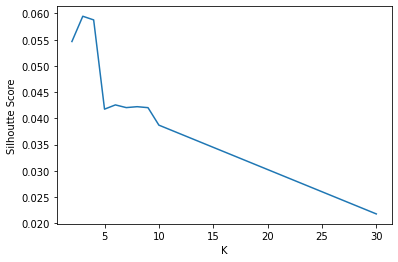

In [ ]:
plt.plot(kl, sil)
plt.ylabel('Silhoutte Score')
plt.xlabel('K')
plt.show()

In [ ]:
labels

array([28, 22,  0, ..., 15, 21, 18], dtype=int32)

In [ ]:
group = {}
index = 0
for link_img in list_image:
    if labels[index] not in group.keys():
        group[labels[index]] = []
        group[labels[index]].append(link_img) 
    else:
        group[labels[index]].append(link_img) 
    index += 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


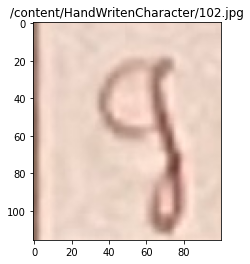

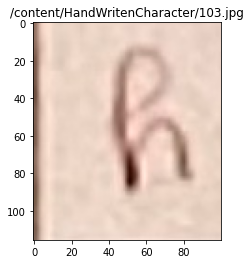

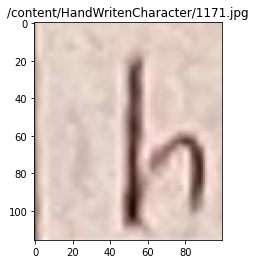

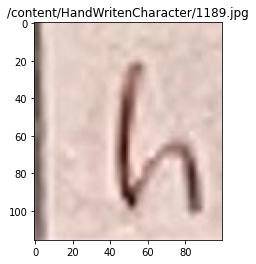

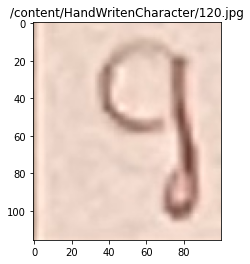

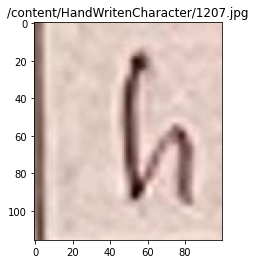

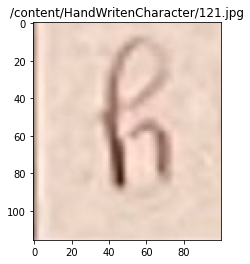

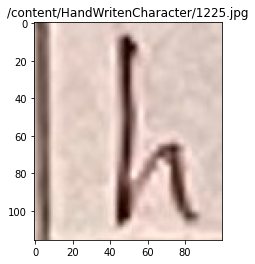

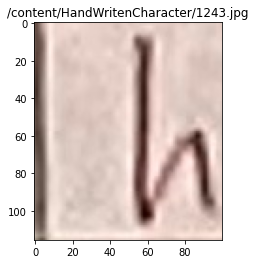

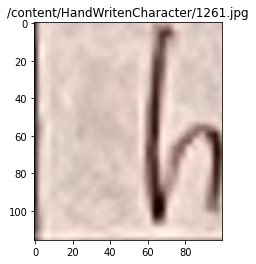

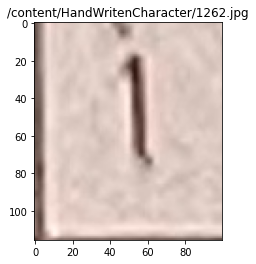

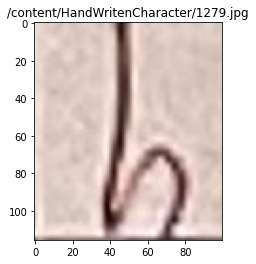

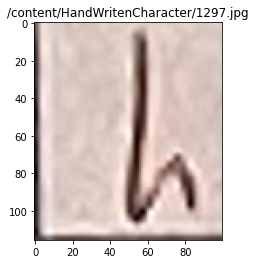

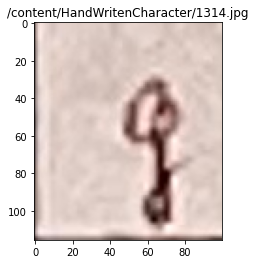

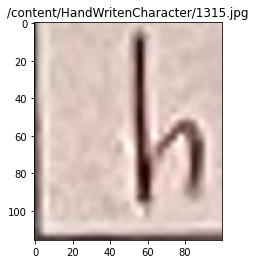

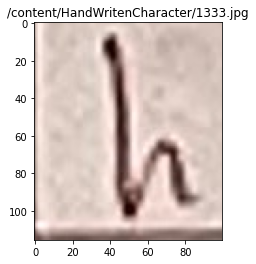

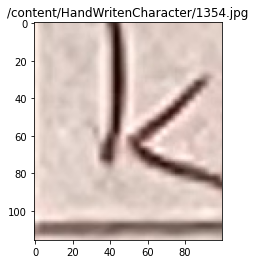

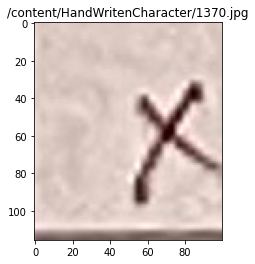

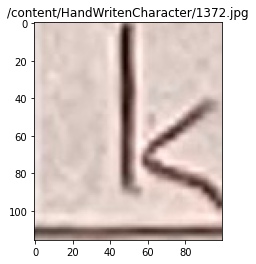

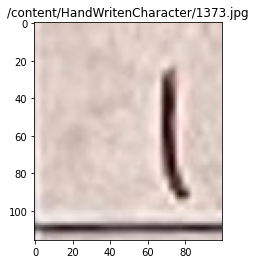

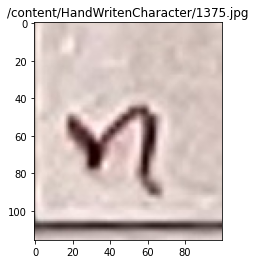

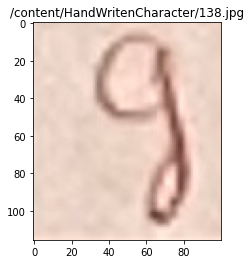

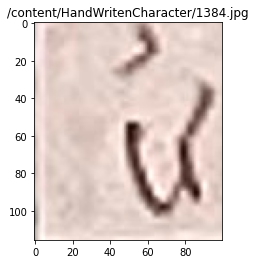

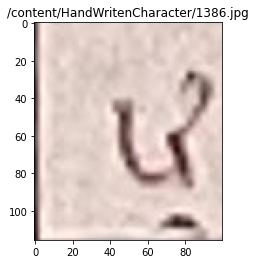

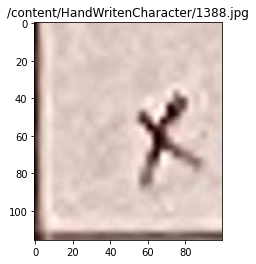

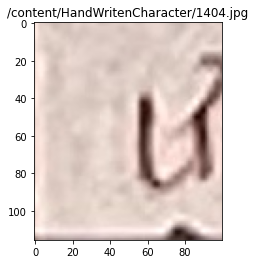

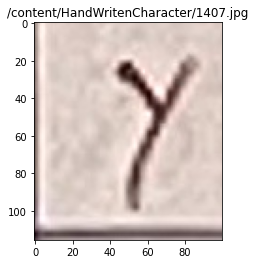

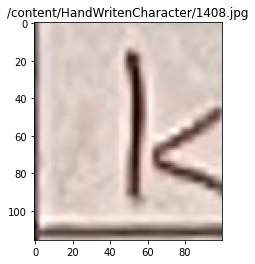

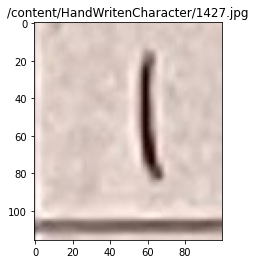

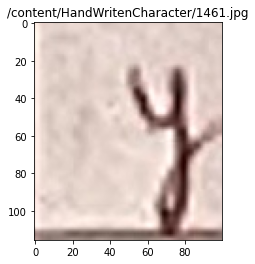

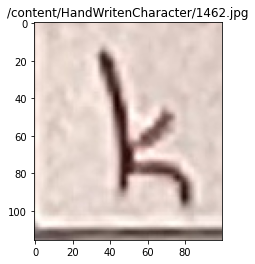

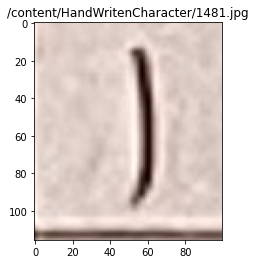

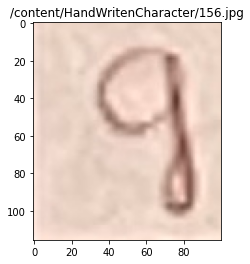

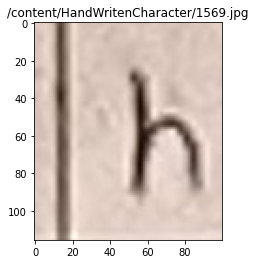

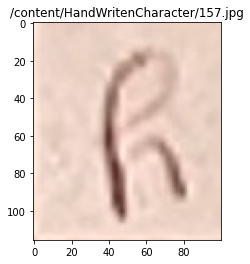

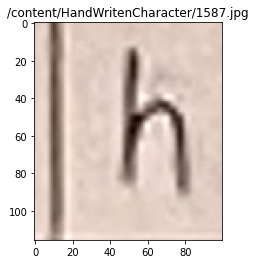

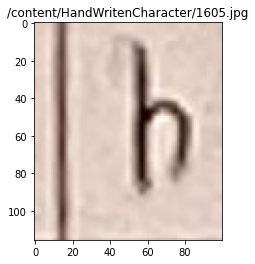

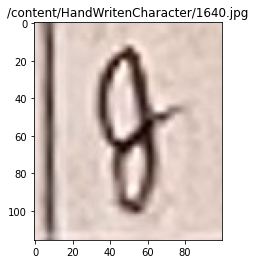

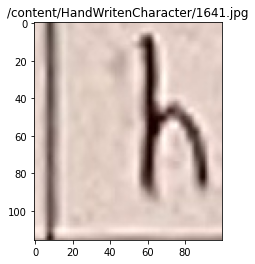

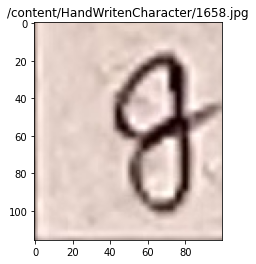

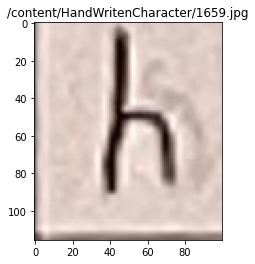

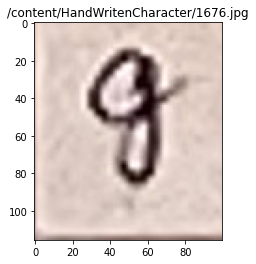

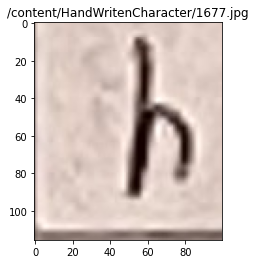

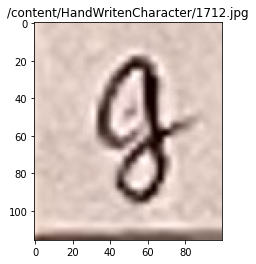

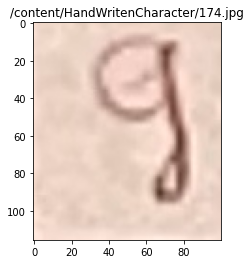

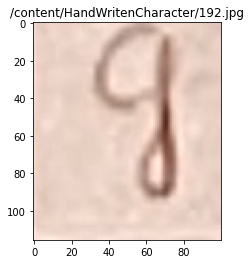

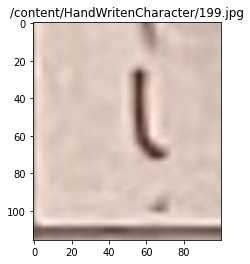

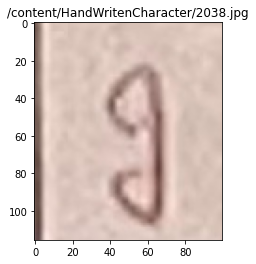

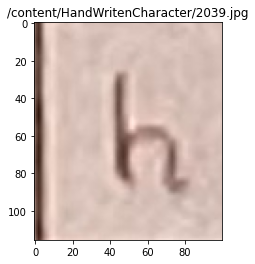

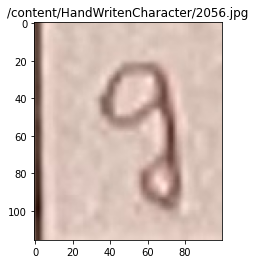

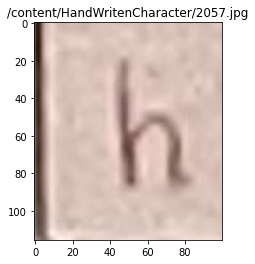

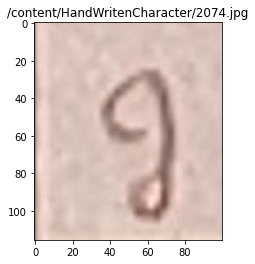

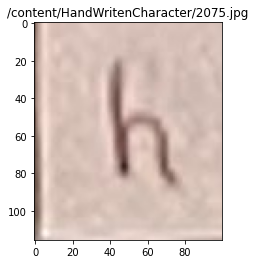

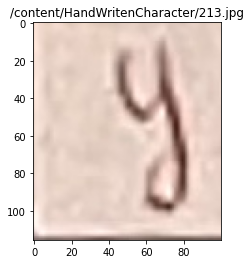

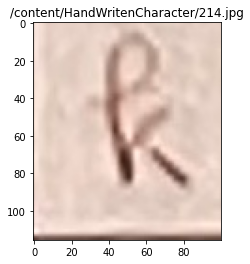

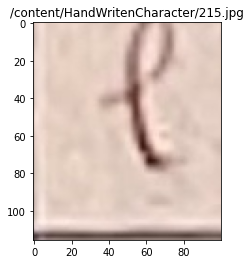

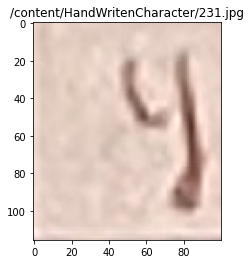

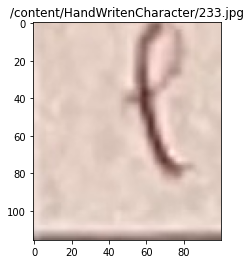

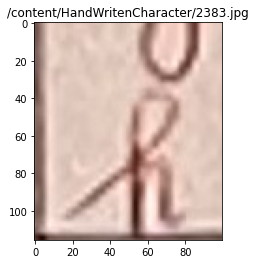

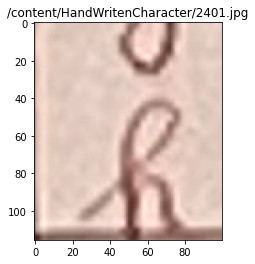

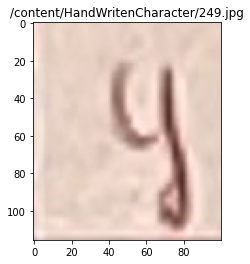

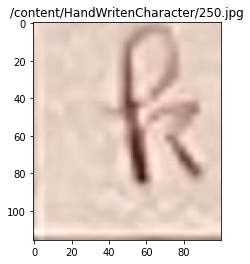

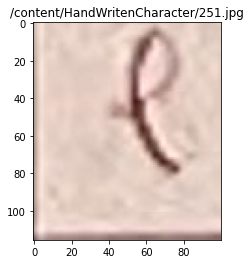

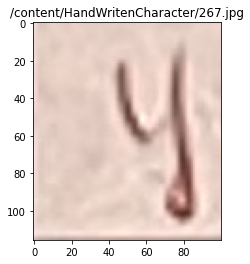

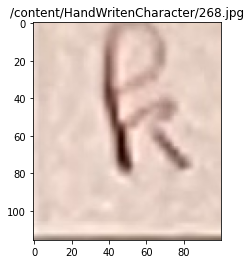

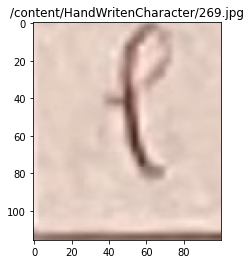

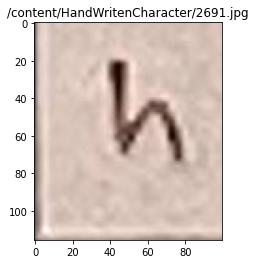

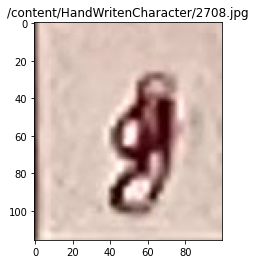

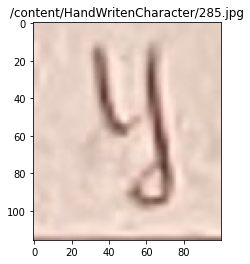

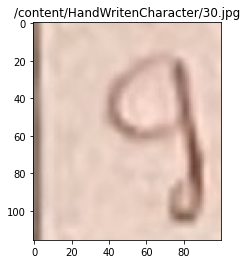

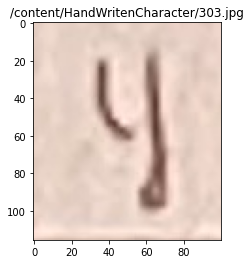

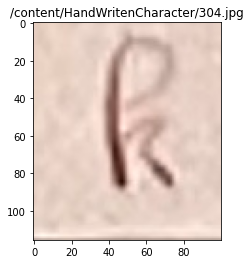

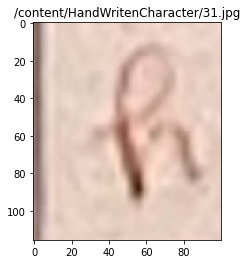

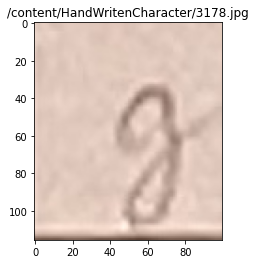

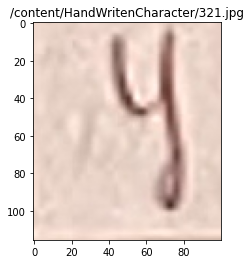

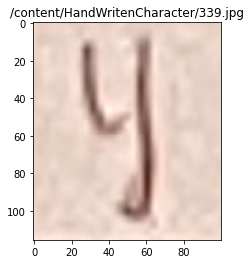

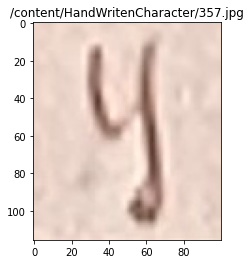

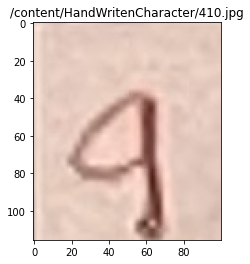

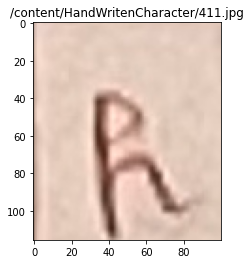

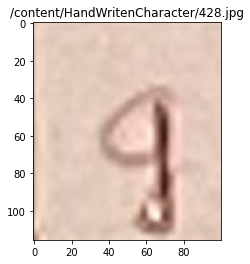

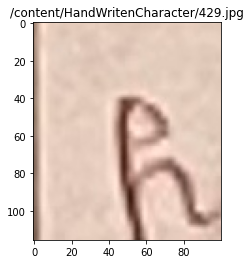

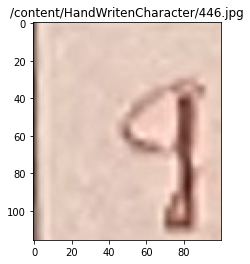

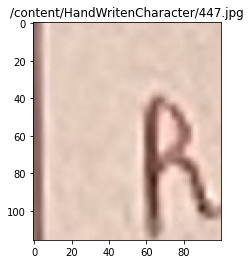

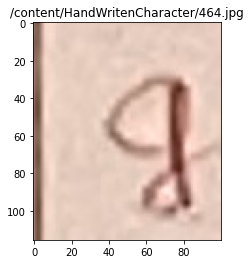

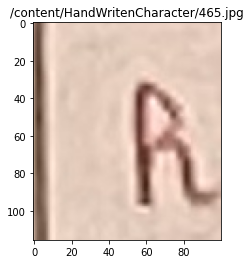

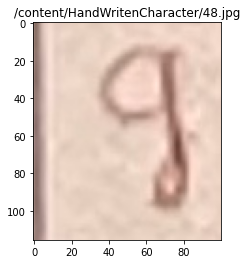

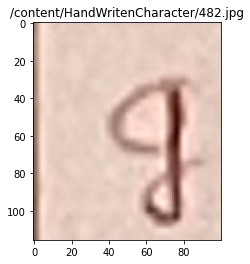

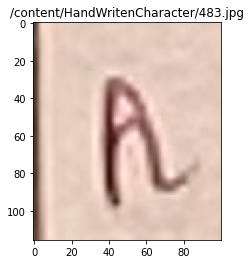

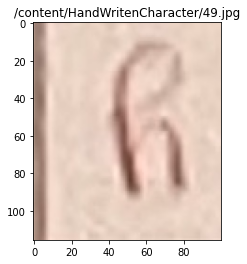

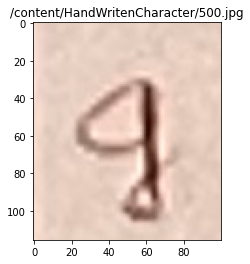

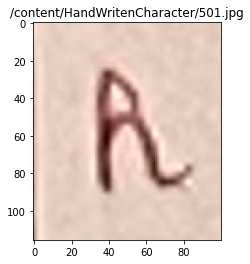

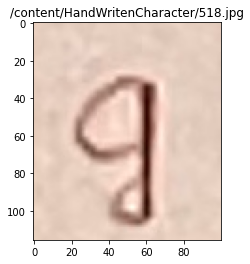

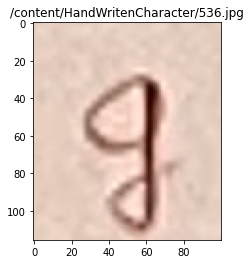

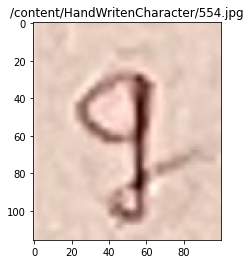

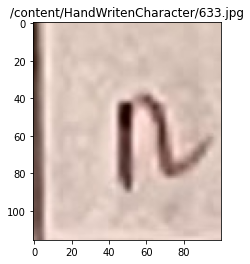

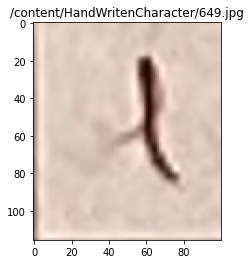

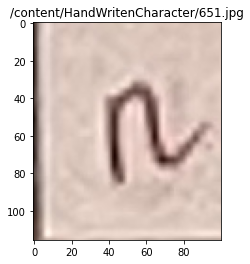

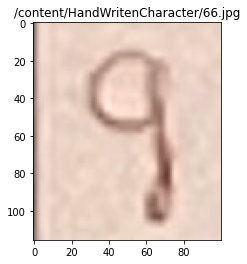

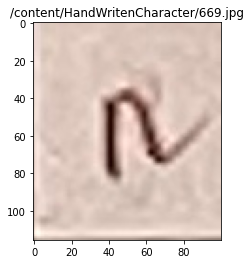

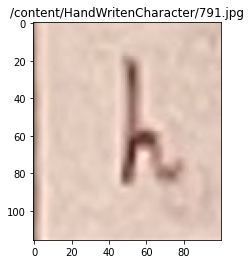

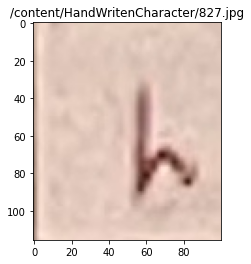

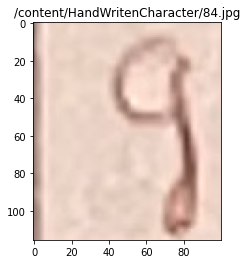

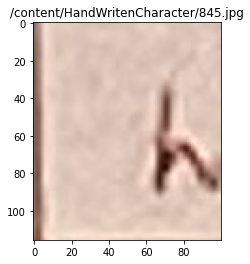

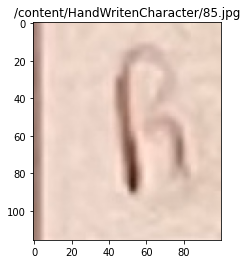

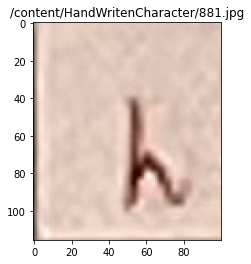

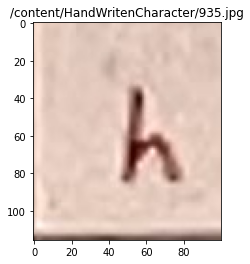

In [ ]:
for img_link in group[0]:
    img = cv2.imread(img_link)
    plt.figure()
    plt.imshow(img)